In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import glob

In [2]:
from scripts.my_camera_cal import readValuesToUndistort
from scripts.my_camera_cal import unwarp

from scripts.my_pipeline import pipeline

In [3]:
mtx,dist=readValuesToUndistort("config/myvalues_to_undistort.p")

In [4]:
# Make a list of calibration images
images = glob.glob('../test_images/*.jpg')
print(images)

['../test_images\\straight_lines1.jpg', '../test_images\\straight_lines2.jpg', '../test_images\\test1.jpg', '../test_images\\test2.jpg', '../test_images\\test3.jpg', '../test_images\\test4.jpg', '../test_images\\test5.jpg', '../test_images\\test6.jpg']


In [5]:
# Read in an image
image = mpimg.imread('../test_images/straight_lines1.jpg')
print(image.shape)

#undistort it
dst = cv2.undistort(image, mtx, dist, None, mtx)
print(dst.shape)

(720, 1280, 3)
(720, 1280, 3)


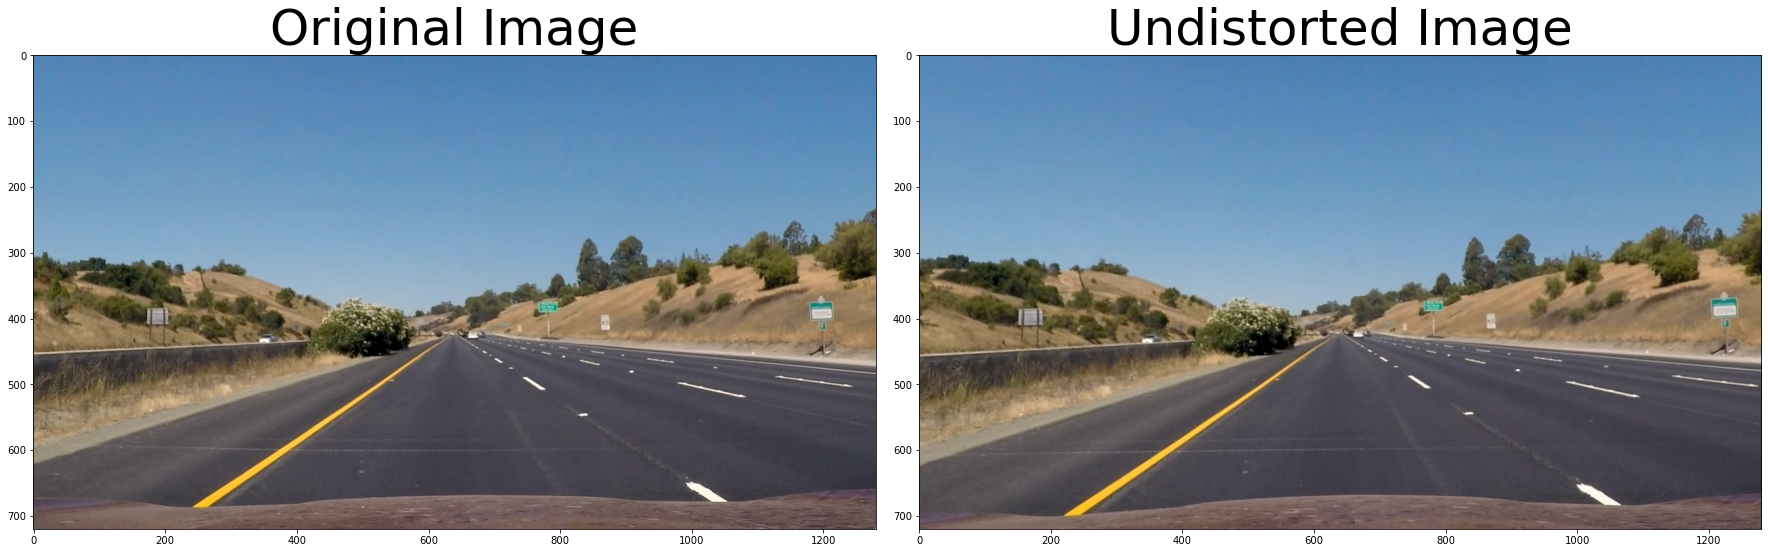

In [6]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [7]:
color_binary,combined_binary= pipeline(dst,channel='s',color_thresh=(110,255), orient='x', sobel_thresh=(20, 100))

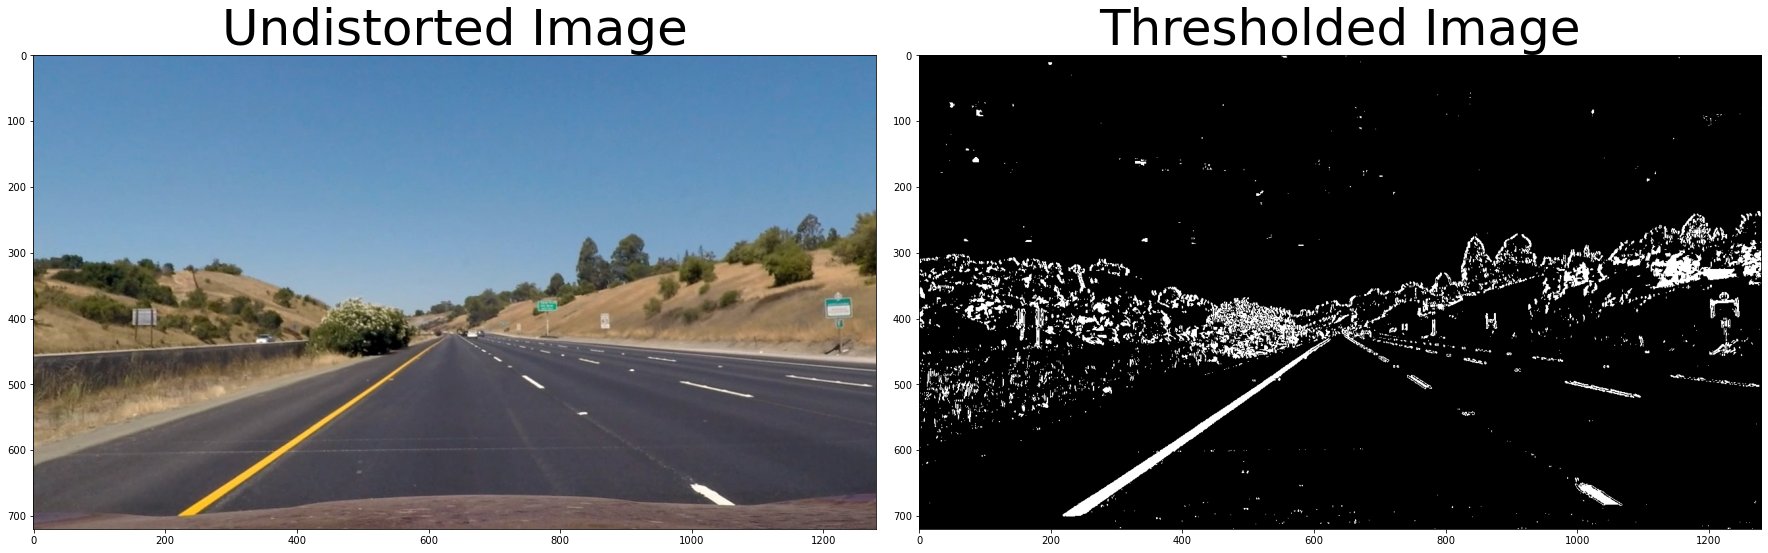

In [8]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(dst)
ax1.set_title('Undistorted Image', fontsize=50)
ax2.imshow(combined_binary,cmap="gray")
ax2.set_title('Thresholded Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [9]:
print(combined_binary.shape)

(720, 1280)


## From here we do a Perspective Transform

In [ ]:
puntos= [(580, 460), (202, 720), (1110, 720), (703, 460)]
puntos.append(puntos[0])
xs, ys = zip(*puntos) #create lists of x and y values
coord=  [(320, 0), (320, 720), (960, 720), (960, 0)]
coord.append(coord[0])
x2s,y2s= zip(*coord)
coord2=  [(336, 0), (336, 720), (976, 720), (976, 0)]
coord2.append(coord2[0])
x3s,y3s= zip(*coord2)

exp_image=dst.copy()
plt.figure(figsize=(20,10))
plt.plot(xs,ys,color='green',linewidth=2)
plt.plot(x2s,y2s,color='red',linewidth=2)
plt.plot(x3s,y3s,color='blue',linewidth=2)
#plt.scatter([580,205,1110,703],[460,720,720,460],color='red')
#plt.plot([580,205,1110,703],[460,720,720,460],color='green')
#plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.imshow(exp_image)

### this obviously don't work

In [ ]:
exp_image2=dst.copy()
plt.figure(figsize=(20,10))
plt.plot([579,581,935,934],[278,517,499,321],color='green')
#plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.imshow(exp_image2)

#src=np.float32([ [579,278],[581,517],[935,499],[934,321]  ]) 
#dst = np.float32([[580,276],[580,518],[940,518],[940,276]])

# The perspective function

In [10]:
def image_perspective(image):
    img_size = (image.shape[1], image.shape[0])
    #We need first a set of source points (in the riginal image)
    #src= [(580, 460), (205, 720), (1110, 720), (703, 460)]
    source= np.float32 ([(580, 460), (202, 720), (1110, 720), (703, 460)])
    
    #src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
    
    #We need a set of destiny points (in the transformed image)
    #dst=  [(320, 0), (320, 720), (960, 720), (960, 0)]
    destino= np.float32([(336, 0), (336, 720), (976, 720), (976, 0)])
    
    M = cv2.getPerspectiveTransform(source, destino)
    warped = cv2.warpPerspective(image, M, img_size)
    
    return warped,M

In [ ]:
img_size=(combined_binary.shape[1],combined_binary.shape[0])
print(img_size)

In [ ]:
source= np.float32 ([(580, 460), (202, 720), (1110, 720), (703, 460)])
destino= np.float32([(336, 0), (336, 720), (976, 720), (976, 0)])

In [ ]:
M = cv2.getPerspectiveTransform(source, destino)

In [ ]:
warped = cv2.warpPerspective(combined_binary, M, img_size)

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(warped,cmap="gray")

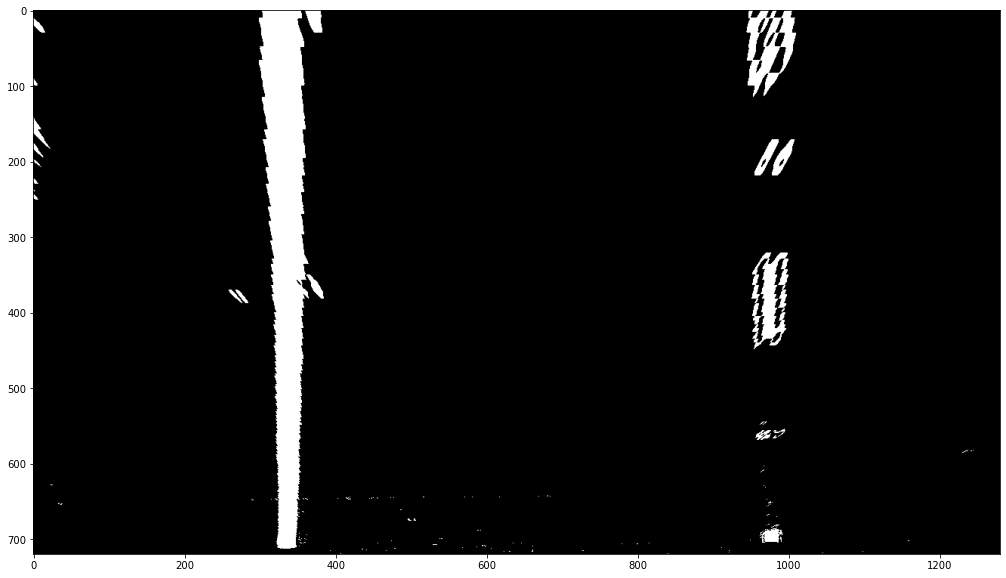

In [11]:
bird_image,M=image_perspective(combined_binary)
plt.figure(figsize=(20,10))
plt.imshow(bird_image,cmap="gray")

In [12]:
puntos= [(580, 460), (202, 720), (1110, 720), (703, 460)]
puntos.append(puntos[0])
xs, ys = zip(*puntos) #create lists of x and y values

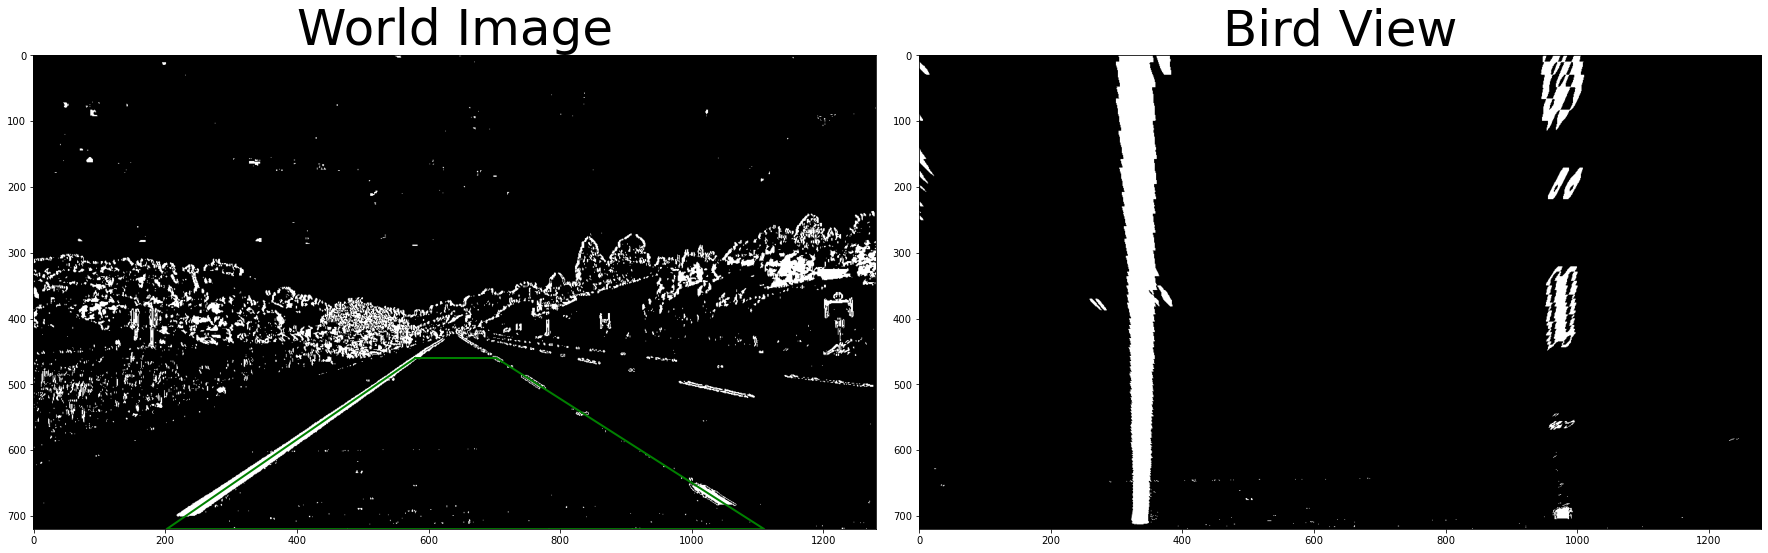

In [13]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.plot(xs,ys,color='green',linewidth=2)
ax1.imshow(combined_binary,cmap='gray')
ax1.set_title('World Image', fontsize=50)
ax2.imshow(bird_image,cmap="gray")
ax2.set_title('Bird View', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)